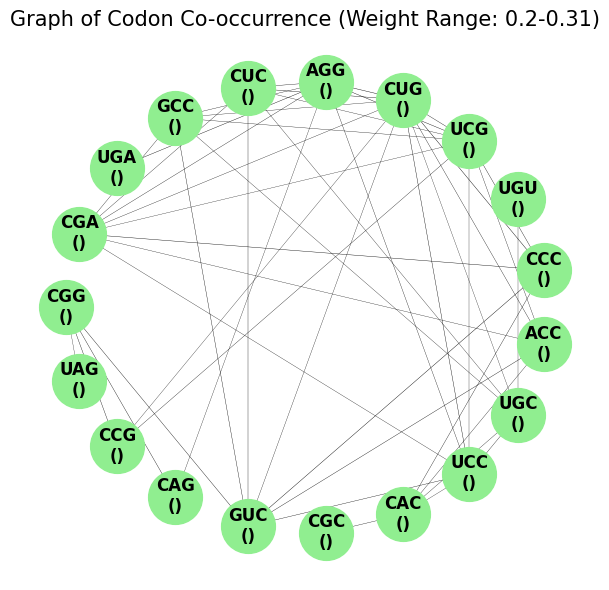

In [25]:
import os
import networkx as nx
from collections import defaultdict
from Bio.SeqUtils.CodonUsage import SynonymousCodons
import pandas as pd
import matplotlib.pyplot as plt

# Define synonymous codons (example, adjust as per your actual data or requirements)
synonymousCodons = {aa: [codon.replace('T', 'U') for codon in codons] for aa, codons in SynonymousCodons.items()}

# Load data from Excel
file_path = 'C:/Users/seq/bacillus_cereus.xlsx'
data = pd.read_excel(file_path, sheet_name='cereus', header=None)

codon1 = data.iloc[:, 0]
codon2 = data.iloc[:, 1]
codon_cooccurrence = data.iloc[:, 2]

# Create defaultdict to store codon co-occurrence data
res_table = defaultdict(lambda: defaultdict(float))

# Populate the defaultdict with codon co-occurrence data
for i in range(1, len(codon1)):
    res_table[codon1[i]][codon2[i]] = codon_cooccurrence[i]
    res_table[codon2[i]][codon1[i]] = codon_cooccurrence[i]

# Create edges data from defaultdict
edges_data1 = []
for codon, neighbors in res_table.items():
    for neighbor, weight in neighbors.items():
        edges_data1.append((codon, neighbor, weight))

# Create a weighted graph G1
G1 = nx.Graph()
G1.add_weighted_edges_from(edges_data1)

# Define the range of weights you want to include in the graph
min_weight = 0.2
max_weight = 0.31

# Filter edges based on weight range
filtered_edges = [(u, v, d['weight']) for u, v, d in G1.edges(data=True) if min_weight <= d['weight'] <= max_weight]

# Create a new graph with filtered edges
G1_filtered = nx.Graph()
G1_filtered.add_weighted_edges_from(filtered_edges)

# Plot the graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pos1 = nx.shell_layout(G1_filtered)
labels1 = {node: f"{node}\n({', '.join(synonymousCodons.get(node, ['']))})" for node in G1_filtered.nodes()}
edges1 = G1_filtered.edges(data=True)
weights1 = [d['weight'] for (u, v, d) in edges1]
nx.draw(G1_filtered, pos1, labels=labels1, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black', width=weights1, arrows=False, font_size=12, font_weight='bold')
plt.title('Graph of Codon Co-occurrence (Weight Range: 0.2-0.31)', fontsize=15)

plt.tight_layout()
plt.show()


['CGG', 'UAA', 'CAC', 'UAG', 'GGC', 'AGG', 'CGC', 'CCC', 'UAC', 'UGA', 'UUC', 'GAC', 'ACU', 'AGC', 'AAC', 'AUC', 'UCC', 'GCA', 'UGC', 'CGU', 'GGU', 'CCA', 'CGA', 'UCU', 'UCG', 'CUG', 'AUA', 'UUG', 'GCU', 'ACA', 'ACC', 'CCU', 'GGG', 'AGA', 'CUC', 'CAG', 'GUG', 'GUU', 'CUU', 'UCA', 'CAA', 'GUC', 'UUA', 'CAU', 'CCG', 'CUA', 'UGG', 'GUA', 'UAU', 'GAU', 'UGU', 'GAG', 'GCG', 'AGU', 'AAG', 'AUG', 'UUU', 'GCC', 'ACG', 'AAU', 'GGA', 'AUU', 'GAA', 'AAA']


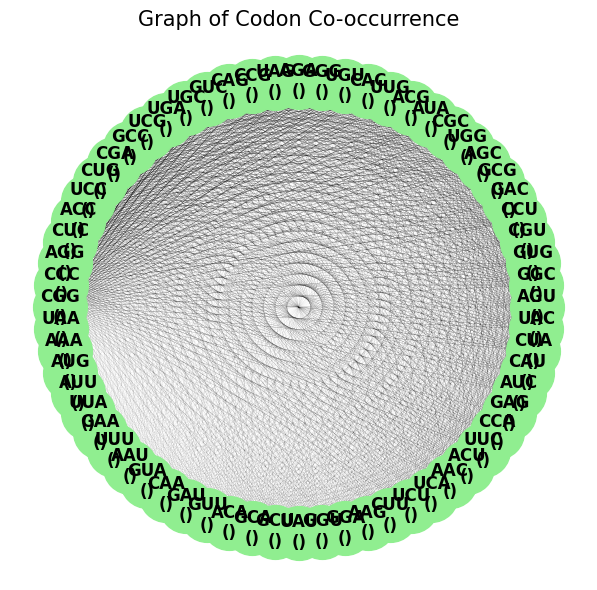

In [21]:
import os
import networkx as nx
from collections import defaultdict
from Bio import SeqIO
from Bio.SeqUtils.CodonUsage import SynonymousCodons
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

synonymousCodons = {aa: [codon.replace('T', 'U') for codon in codons] for aa, codons in SynonymousCodons.items()}

file_path = 'C:/Users/seq/bacillus_cereus.xlsx'
file_path_to_save = 'C:/Users/Kasia/OneDrive/Pulpit/bacillus_cereus_processed.xlsx'
data = pd.read_excel(file_path, sheet_name='cereus', header=None)

codon1 = data.iloc[:, 0]
codon2 = data.iloc[:, 1]
codon_cooccurrence = data.iloc[:, 2]

res_table = defaultdict(lambda: defaultdict(float))

for i in range(1, len(codon1)):
    res_table[codon1[i]][codon2[i]] = codon_cooccurrence[i]
    res_table[codon2[i]][codon1[i]] = codon_cooccurrence[i]

codons = []
for codon in res_table:
    codons.append(codon)
    
print(codons)

res_dataframe = {'': codons}

for codon1 in codons:
    res_dataframe[codon1] = [res_table[codon1][codon2] for codon2 in codons]

res_dataframe = pd.DataFrame(res_dataframe)
res_dataframe = res_dataframe[[''] + codons]

# Create edges data from defaultdict
edges_data1 = []
for codon, neighbors in res_table.items():
    for neighbor, weight in neighbors.items():
        edges_data1.append((codon, neighbor, weight))

# Create a weighted graph G1
G1 = nx.Graph()
G1.add_weighted_edges_from(edges_data1)

min_weight = 0,2
max_weight = 0,31

# Plot the graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
pos1 = nx.shell_layout(G1)
labels1 = {node: f"{node}\n({', '.join(synonymousCodons.get(node, ['']))})" for node in G1.nodes()}
edges1 = G1.edges(data=True)
weights1 = [d['weight'] for (u, v, d) in edges1]
nx.draw(G1, pos1, labels=labels1, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black', width=weights1, arrows=False, font_size=12, font_weight='bold')
plt.title('Graph of Codon Co-occurrence', fontsize=15)

# plt.subplot(1, 2, 2) 
# pos1 = nx.shell_layout(G1)
# labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G1.nodes()}
# nx.draw(G1, pos1, labels=labels, with_labels=True, node_color='lightblue', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
# plt.title('0,32-0,63', fontsize=20)

plt.tight_layout()
plt.show()

#  for aa, codons in synonymousCodons.items():

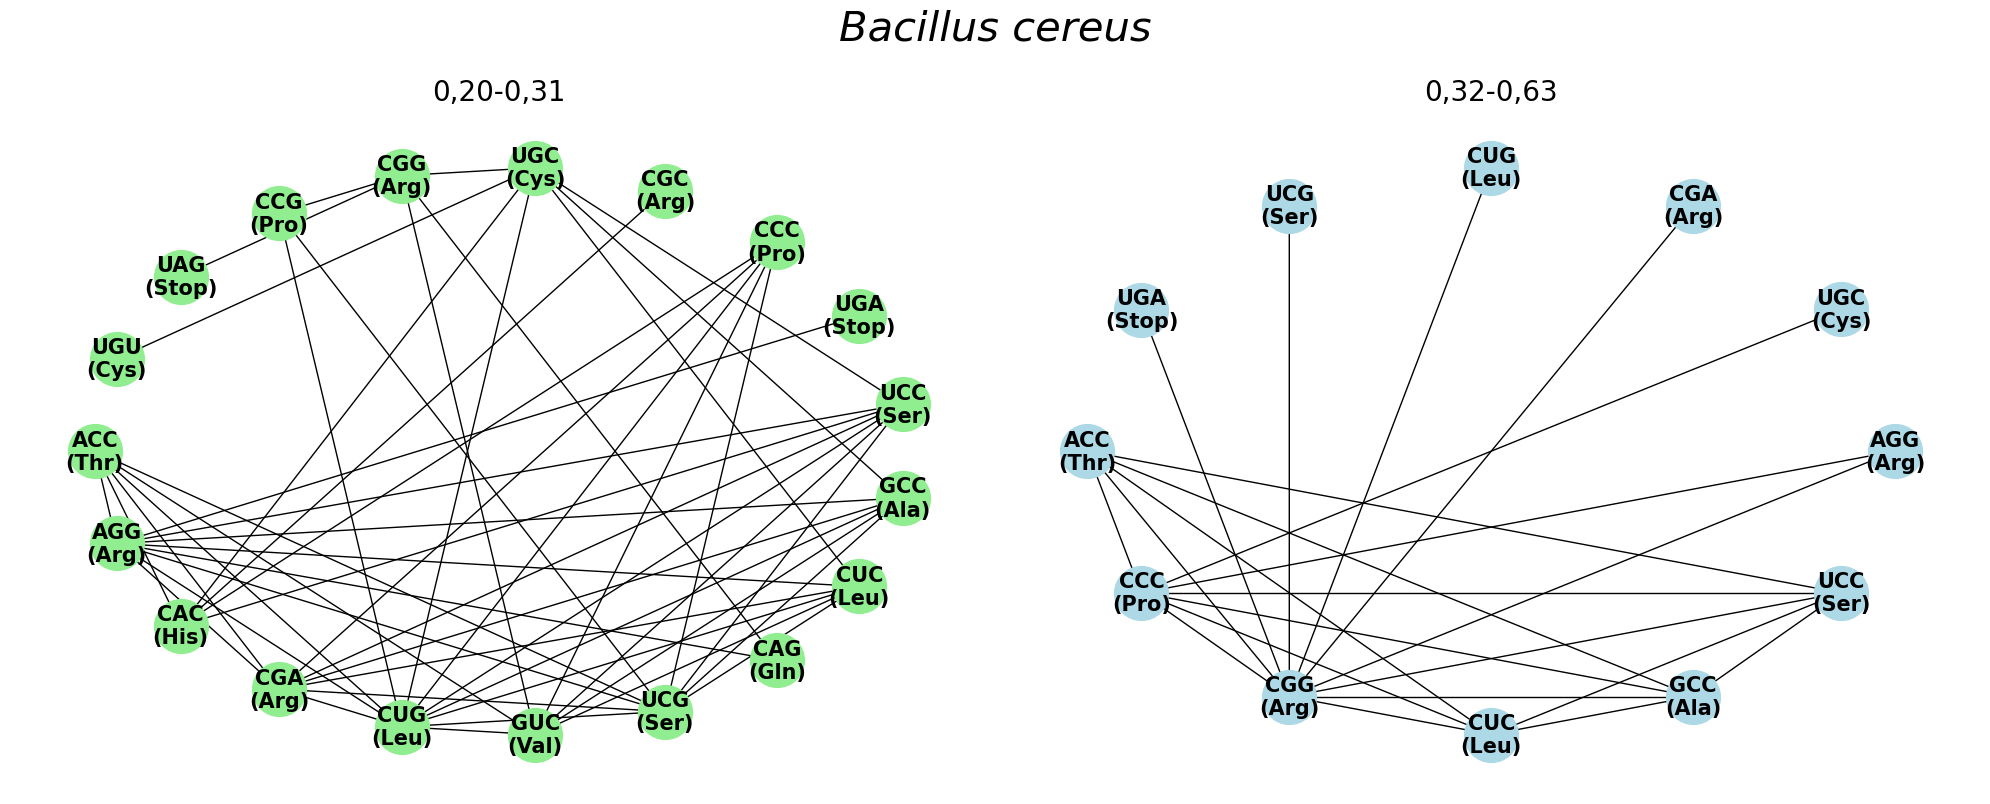

In [115]:
import networkx as nx
import matplotlib.pyplot as plt
# cereus
input_text1 = """
ACC    CCC
ACC    GCC
CCC    CGG
AGG    CGG
CCC    UCC
CCC    CUC
ACC    UCC
CGG    CUC
ACC    CUC
ACC    CGG
CCC    GCC
CGG    UCC
CUC    UCC
CGG    CUG
GCC    UCC
CCC    UGC
CGA    CGG
CGG    GCC
AGG    CCC
CUC    GCC
CGG    UCG
CGG    UGA
"""
input_text2 = """
CGG UGC
ACC AGG
CCC GUC
CCC CUG
AGG CUG
CCC CGA
AGG UGA
AGG UCG
CUC CUG
CUG UCC
CGG GUC
ACC GUC
CAG CGG
CCG CGG
GCC GUC
CCC UCG
CUG UCG
GUC UCC
AGG CUC
CUC GUC
CAC CCC
ACC CUG
AGG CGA
CAC CGC
GCC UCG
CCG UCG
AGG GCC
AGG UCC
UCC UGC
CGA CUG
ACC UCG
CGA CUC
CGA GCC
CUC UCG
CUG GCC
ACC CAC
CAC UGC
ACC CGA
CGA UCC
CUG GUC
GCC UGC
CUC UGC
UGC UGU
UCC UCG
AGG CAG
CGA UCG
CAC UCC
CUG UGC
CCG CUG
CGG UAG
"""
codon_to_amino = {
    'UUU': 'Phe', 'UUC': 'Phe', 'UUA': 'Leu', 'UUG': 'Leu',
    'CUU': 'Leu', 'CUC': 'Leu', 'CUA': 'Leu', 'CUG': 'Leu',
    'AUU': 'Ile', 'AUC': 'Ile', 'AUA': 'Ile', 'AUG': 'Met',
    'GUU': 'Val', 'GUC': 'Val', 'GUA': 'Val', 'GUG': 'Val',
    'UCU': 'Ser', 'UCC': 'Ser', 'UCA': 'Ser', 'UCG': 'Ser',
    'CCU': 'Pro', 'CCC': 'Pro', 'CCA': 'Pro', 'CCG': 'Pro',
    'ACU': 'Thr', 'ACC': 'Thr', 'ACA': 'Thr', 'ACG': 'Thr',
    'GCU': 'Ala', 'GCC': 'Ala', 'GCA': 'Ala', 'GCG': 'Ala',
    'UAU': 'Tyr', 'UAC': 'Tyr', 'UAA': 'Stop', 'UAG': 'Stop',
    'CAU': 'His', 'CAC': 'His', 'CAA': 'Gln', 'CAG': 'Gln',
    'AAU': 'Asn', 'AAC': 'Asn', 'AAA': 'Lys', 'AAG': 'Lys',
    'GAU': 'Asp', 'GAC': 'Asp', 'GAA': 'Glu', 'GAG': 'Glu',
    'UGU': 'Cys', 'UGC': 'Cys', 'UGA': 'Stop', 'UGG': 'Trp',
    'CGU': 'Arg', 'CGC': 'Arg', 'CGA': 'Arg', 'CGG': 'Arg',
    'AGU': 'Ser', 'AGC': 'Ser', 'AGA': 'Arg', 'AGG': 'Arg',
    'GGU': 'Gly', 'GGC': 'Gly', 'GGA': 'Gly', 'GGG': 'Gly'
}

input_text1 = sorted(input_text1.strip().split("\n"))

edges_data1 = []
for line in input_text1:
    parts = line.split()
    if len(parts) == 2:
        edges_data1.append((parts[0], parts[1]))
        
input_text2 = sorted(input_text2.strip().split("\n"))

edges_data2 = []
for line in input_text2:
    parts = line.split()
    if len(parts) == 2:
        edges_data2.append((parts[0], parts[1]))


G1 = nx.Graph()
G1.add_edges_from(edges_data1)

G2 = nx.Graph()
G2.add_edges_from(edges_data2)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 2) 
pos1 = nx.shell_layout(G1)
labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G1.nodes()}
nx.draw(G1, pos1, labels=labels, with_labels=True, node_color='lightblue', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
plt.title('0,32-0,63', fontsize=20)

plt.subplot(1, 2, 1)  
pos2 = nx.shell_layout(G2)
labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G2.nodes()}
nx.draw(G2, pos2, labels=labels, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
plt.title('0,20-0,31', fontsize=20)

species_name = 'Bacillus cereus'
plt.suptitle(species_name, fontstyle='italic', fontsize=30, y=1)
plt.tight_layout()
plt.show()


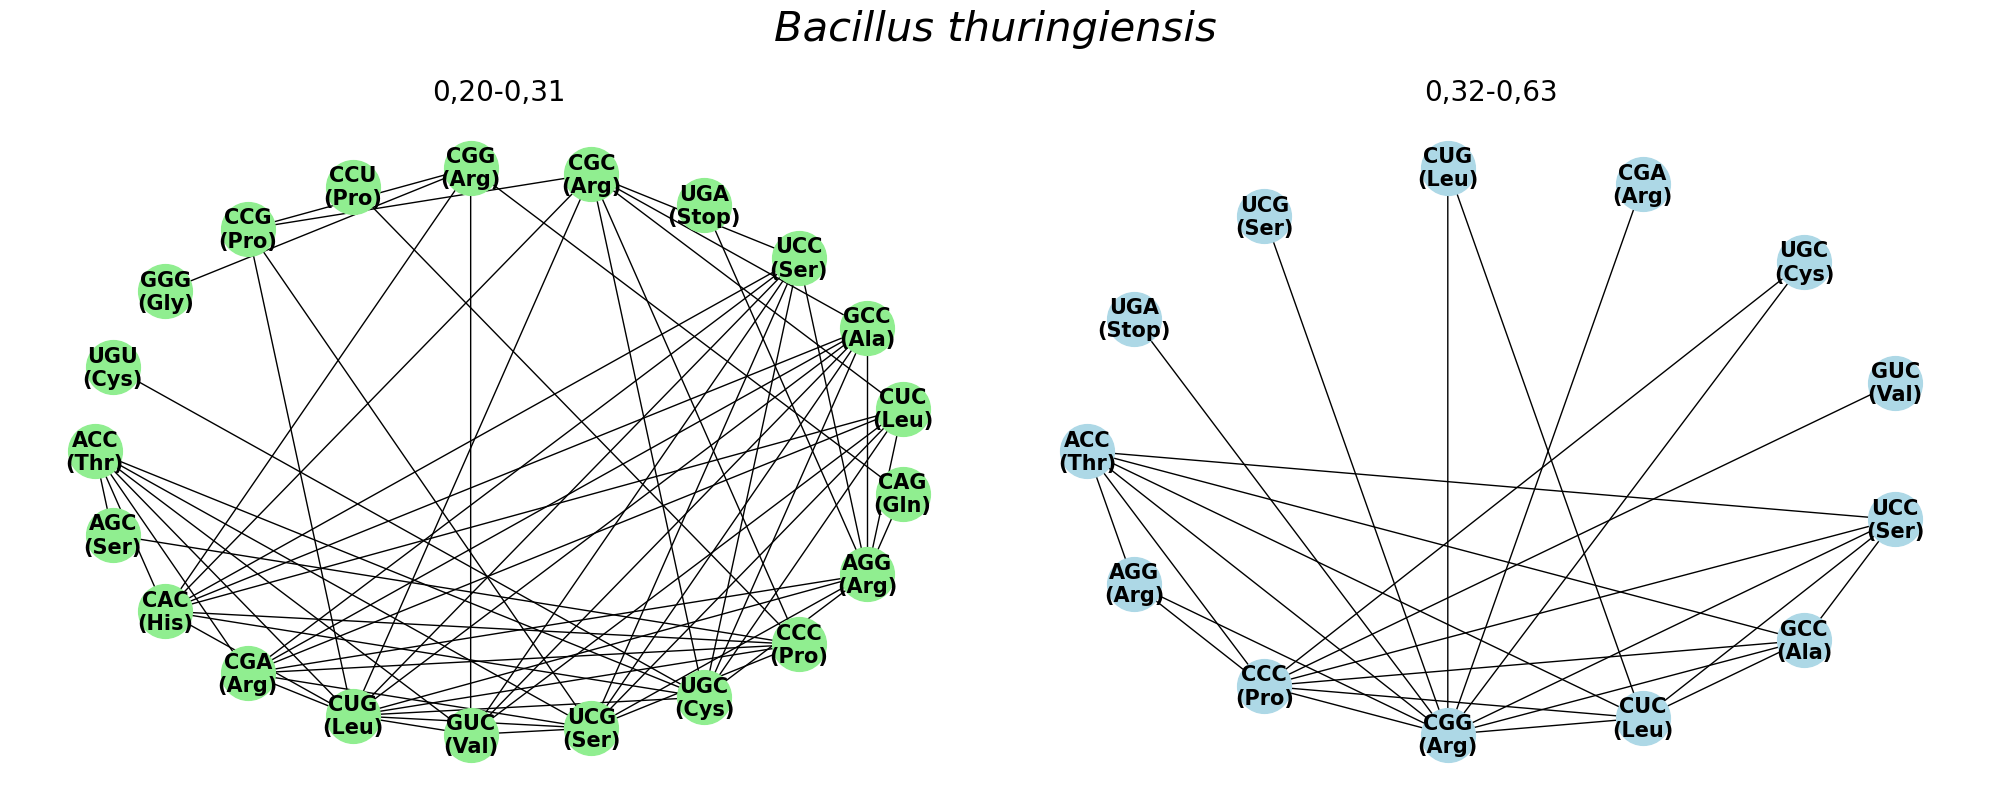

In [114]:
import networkx as nx
import matplotlib.pyplot as plt
# thuringiensis
input_text1 = """
ACC CCC
AGG CGG
CCC CGG
CCC UCC
CCC CUC
ACC UCC
ACC CGG
CGG CUC
CCC GCC
ACC CUC
CGG UCC
CUC UCC
CGG UGA
ACC GCC
CGG CUG
CUC GCC
CGG UCG
GCC UCC
AGG CCC
CGA CGG
CCC UGC
CCC GUC
CGG UGC
CGG GCC
ACC AGG
CUC CUG
"""
input_text2 = """
CAC CCC
CCC CUG
AGG CUG
CCC UCG
AGG UGA
CCC CGA
AGG UCG
CGG GUC
ACC CUG
CUG UCG
CUG UCC
AGG CUC
CAC CGC
GCC GUC
CUC UGC
ACC GUC
UCC UGC
GUC UCC
AGG CGA
CUC GUC
CUC UCG
CCG CGG
CAG CGG
AGG UCC
ACC UCG
CGA CUC
CUG GCC
ACC CAC
CAC UGC
ACC CGA
GCC UCG
CGA GCC
UGC UGU
CGA CUG
CCG UCG
ACC UGC
CAC UCC
CAC GCC
CAC CUC
CAC CGG
CGC UGC
AGG GCC
CCG CUG
CGA UCC
UCC UCG
CCC CCU
CCC CGC
CAC CUG
CGC GCC
CCG CGC
CGA UCG
CUG UGC
CGC CUC
CUG GUC
AGG UGC
GCC UGC
GUC UCG
ACC AGC
AGC CCC
CGG GGG
CGC CUG
CGC UCC
AGG CAG
"""
codon_to_amino = {
    'UUU': 'Phe', 'UUC': 'Phe', 'UUA': 'Leu', 'UUG': 'Leu',
    'CUU': 'Leu', 'CUC': 'Leu', 'CUA': 'Leu', 'CUG': 'Leu',
    'AUU': 'Ile', 'AUC': 'Ile', 'AUA': 'Ile', 'AUG': 'Met',
    'GUU': 'Val', 'GUC': 'Val', 'GUA': 'Val', 'GUG': 'Val',
    'UCU': 'Ser', 'UCC': 'Ser', 'UCA': 'Ser', 'UCG': 'Ser',
    'CCU': 'Pro', 'CCC': 'Pro', 'CCA': 'Pro', 'CCG': 'Pro',
    'ACU': 'Thr', 'ACC': 'Thr', 'ACA': 'Thr', 'ACG': 'Thr',
    'GCU': 'Ala', 'GCC': 'Ala', 'GCA': 'Ala', 'GCG': 'Ala',
    'UAU': 'Tyr', 'UAC': 'Tyr', 'UAA': 'Stop', 'UAG': 'Stop',
    'CAU': 'His', 'CAC': 'His', 'CAA': 'Gln', 'CAG': 'Gln',
    'AAU': 'Asn', 'AAC': 'Asn', 'AAA': 'Lys', 'AAG': 'Lys',
    'GAU': 'Asp', 'GAC': 'Asp', 'GAA': 'Glu', 'GAG': 'Glu',
    'UGU': 'Cys', 'UGC': 'Cys', 'UGA': 'Stop', 'UGG': 'Trp',
    'CGU': 'Arg', 'CGC': 'Arg', 'CGA': 'Arg', 'CGG': 'Arg',
    'AGU': 'Ser', 'AGC': 'Ser', 'AGA': 'Arg', 'AGG': 'Arg',
    'GGU': 'Gly', 'GGC': 'Gly', 'GGA': 'Gly', 'GGG': 'Gly'
}

input_text1 = sorted(input_text1.strip().split("\n"))

edges_data1 = []
for line in input_text1:
    parts = line.split()
    if len(parts) == 2:
        edges_data1.append((parts[0], parts[1]))
        
input_text2 = sorted(input_text2.strip().split("\n"))

edges_data2 = []
for line in input_text2:
    parts = line.split()
    if len(parts) == 2:
        edges_data2.append((parts[0], parts[1]))


G1 = nx.Graph()
G1.add_edges_from(edges_data1)

G2 = nx.Graph()
G2.add_edges_from(edges_data2)

plt.figure(figsize=(20, 8))
# 1graf
plt.subplot(1, 2, 2) 
pos1 = nx.shell_layout(G1)
labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G1.nodes()}
nx.draw(G1, pos1, labels=labels, with_labels=True, node_color='lightblue', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
plt.title('0,32-0,63', fontsize=20)
# 2graf
plt.subplot(1, 2, 1)  
pos2 = nx.shell_layout(G2)
labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G2.nodes()}
nx.draw(G2, pos2, labels=labels, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
plt.title('0,20-0,31', fontsize=20)

species_name = 'Bacillus thuringiensis'
plt.suptitle(species_name, fontstyle='italic', fontsize=30, y=1)
plt.tight_layout()
plt.show()



C:\Users\Kasia\AppData\Local\Temp\ipykernel_1616\137320599.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


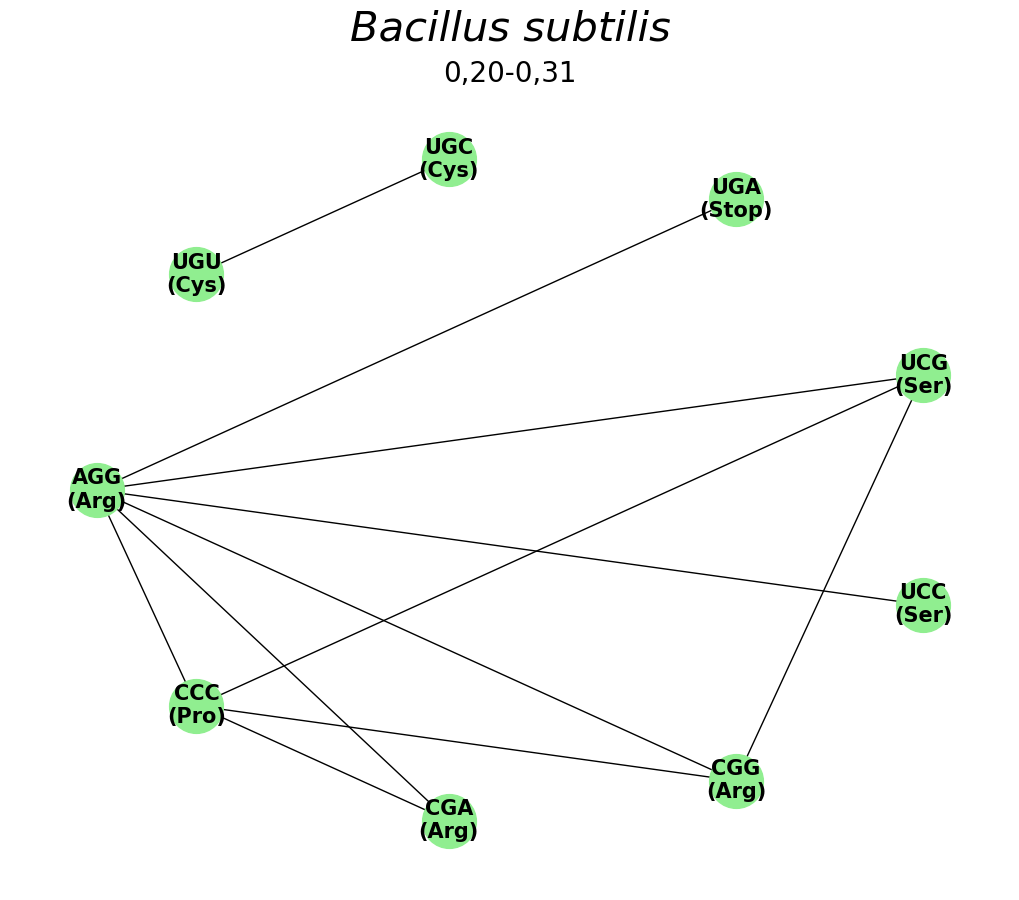

In [113]:
import networkx as nx
import matplotlib.pyplot as plt
# subtilis
input_text1 = """
AGG CCC
AGG CGG
AGG UGA
CCC CGG
UGC UGU
AGG CGA
CCC UCG
CCC CGA
AGG UCG
CGG UCG
AGG UCC
"""

codon_to_amino = {
    'UUU': 'Phe', 'UUC': 'Phe', 'UUA': 'Leu', 'UUG': 'Leu',
    'CUU': 'Leu', 'CUC': 'Leu', 'CUA': 'Leu', 'CUG': 'Leu',
    'AUU': 'Ile', 'AUC': 'Ile', 'AUA': 'Ile', 'AUG': 'Met',
    'GUU': 'Val', 'GUC': 'Val', 'GUA': 'Val', 'GUG': 'Val',
    'UCU': 'Ser', 'UCC': 'Ser', 'UCA': 'Ser', 'UCG': 'Ser',
    'CCU': 'Pro', 'CCC': 'Pro', 'CCA': 'Pro', 'CCG': 'Pro',
    'ACU': 'Thr', 'ACC': 'Thr', 'ACA': 'Thr', 'ACG': 'Thr',
    'GCU': 'Ala', 'GCC': 'Ala', 'GCA': 'Ala', 'GCG': 'Ala',
    'UAU': 'Tyr', 'UAC': 'Tyr', 'UAA': 'Stop', 'UAG': 'Stop',
    'CAU': 'His', 'CAC': 'His', 'CAA': 'Gln', 'CAG': 'Gln',
    'AAU': 'Asn', 'AAC': 'Asn', 'AAA': 'Lys', 'AAG': 'Lys',
    'GAU': 'Asp', 'GAC': 'Asp', 'GAA': 'Glu', 'GAG': 'Glu',
    'UGU': 'Cys', 'UGC': 'Cys', 'UGA': 'Stop', 'UGG': 'Trp',
    'CGU': 'Arg', 'CGC': 'Arg', 'CGA': 'Arg', 'CGG': 'Arg',
    'AGU': 'Ser', 'AGC': 'Ser', 'AGA': 'Arg', 'AGG': 'Arg',
    'GGU': 'Gly', 'GGC': 'Gly', 'GGA': 'Gly', 'GGG': 'Gly'
}

input_text1 = sorted(input_text1.strip().split("\n"))

edges_data1 = []
for line in input_text1:
    parts = line.split()
    if len(parts) == 2:
        edges_data1.append((parts[0], parts[1]))
        
# input_text2 = sorted(input_text2.strip().split("\n"))

# edges_data2 = []
# for line in input_text2:
#     parts = line.split()
#     if len(parts) == 2:
#         edges_data2.append((parts[0], parts[1]))


G1 = nx.Graph()
G1.add_edges_from(edges_data1)

# G2 = nx.Graph()
# G2.add_edges_from(edges_data2)

plt.figure(figsize=(10, 8))

# plt.subplot(1, 2, 1) 
pos1 = nx.shell_layout(G1)
labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G1.nodes()}
nx.draw(G1, pos1, labels=labels, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='black', arrows=False, font_size=15, font_weight='bold')
plt.title('0,20-0,31', fontsize=20)

# # Drugi graf
# plt.subplot(1, 2, 2) 
# pos2 = nx.shell_layout(G2)
# labels = {node: f"{node}\n({codon_to_amino.get(node, 'Unknown')})" for node in G2.nodes()}
# nx.draw(G2, pos2, labels=labels, with_labels=True, node_color='lightblue', node_size=1000, edge_color='black', arrows=False, font_size=12, font_weight='bold')
# plt.title('0,15-0,20')
species_name = 'Bacillus subtilis'

plt.suptitle(species_name, fontstyle='italic', fontsize=30, y=1.1)
plt.tight_layout()
plt.show()